<div style="background-color:#FDBD55; padding:0.7em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <h1 style="text-align:center; color:black">🙋🏻‍♂️Welcome to QUANTIUM DATA ANAYSIS PROJECT</h1>
    <h2 style="text-align:center; color:black">Task 1-Data Preparation and Customer Analytics</h2>
</div>

I am part of <i><b>Quantium’s retail analytics team</b></i> and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. In this notebook we are going to explore this sample dataset form QUANTIUM and create insights from the analysis which will be fed into the supermarket’s strategic plan for the chip category in the next half year.

In particular, we will focus on: 
<br>**1. Analyzing transaction and customer data to identify trends and inconsistencies.** 
<br>**2. Develop metrics and examine sales drivers to gain insights into overall sales performance.**
<br>**3. Create visualizations and prepare findings to formulate a clear recommendation for the client's strategy.**

Main goals of this task are :
- Examine transaction data - check for missing data, anomalies, outliers and clean them
- Examine customer data - similar to above transaction data
- Data analysis and customer segments - create charts and graphs, note trends and insights
- Deep dive into customer segments - determine which segments should be targetted

# Table of contents

### 1. [Importing Data 📥](#importing)

### 2. [Data Cleaning and Preparation🔍](#cleaning)

### 3. [Data visualization & EDA 📈](#eda)

<div style="background-color:#FDBD55; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <h2 style="text-align:left; color:#342E37">About Dataset</h2>
</div>

---
<mark style="background-color:#FDBD55; padding:4px; border-radius:5px; font-size:17px"> Transaction data </mark> This dataset consist of the DATE, STORE NUMBER, LOYALTY CARD NUMBER, TRANSACTION ID, PRODUCT NUMBER, PRODUCT NAME, PRODUCT QUANTITY and TOTAL SALES of the customer and product details. 
In which we are to look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis.

---

<mark style="background-color:#FDBD55; padding:4px; border-radius:5px; font-size:17px"> Customer purchase behaviour data </mark> This dataset consist of the LOYALTY CARD NUMBER, LIFESTAGE and PREMIUM CUSTOMER of the customer. 
Which will help us check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

<div style="display: flex; justify-content: flex-start; align-items: center; background-color:#FDBD55; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37; height: 50px;">
    <a id="importing"><h2 style="text-align:left; color:#342E37">Importing Data & Libraries 📥</h2></a>
</div>


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset from the directory

In [5]:
transaction = pd.read_excel("C:/Users/Mishael/Downloads/Quantium Data Project/QVI_transaction_data - Copy.xlsx")
purchase = pd.read_csv("C:/Users/Mishael/Downloads/Quantium Data Project/QVI_purchase_behaviour - Copy.csv")

In [6]:
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [7]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


<div style="display: flex; justify-content: flex-start; align-items: center; background-color:#FDBD55; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37; height: 50px;">
    <a id="cleaning"><h2 style="text-align:left; color:#342E37">Data Cleaning and Preparation🔍</h2></a>
</div>


### Checking the integrity of the data

In [8]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Observation from the info()
---
    
From the above result there appears to be no null value in any of the data set, but just to be certain we are going to be checking for **NULL values**
<br>In addition, there are certain wrong data formating as well as some outlier which needs to be corrected.

### Checking for NULL value

In [10]:
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [11]:
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<h2> Transaction Data </h2>
<h3 style="text-align:left; color:#FF0000">Note:</h3> <b><i>From the Instruction given, we were told that the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. Hence we must ensure the product sold is Chips related since the client is particularly interested in customer segments and their chip purchasing behaviour.</i></b>

<i>Some products under the column PROD_NAME have abbreviated words which need to be correctd before filtering the column.</i>

In [12]:
transaction['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [13]:
# The customer only wants insights on chips category, hence, we eliminate all the other products.
transaction = transaction[transaction['PROD_NAME'].str.contains("Salsa")==False]
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


<h3 style="text-align:left; color:#FF0000">Note:</h3> <B><i>The date input according to excel formatting. We need to change the date format so that the date will be applicable to the analysis.</i></B>

In [14]:
#transaction['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction['DATE'], unit='D')
base_date = pd.Timestamp('1899-12-30')
transaction['DATE'] = base_date + pd.to_timedelta(transaction['DATE'], unit='D')
transaction['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 246742, dtype: datetime64[ns]

### Identifying Outliers

In [15]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


<b>From the disparity between the value of the 'min' and 'max' on the PROD_QTY column we can assume there is an outlier. But just to be certain let's confirm using a scatter plot.</b>

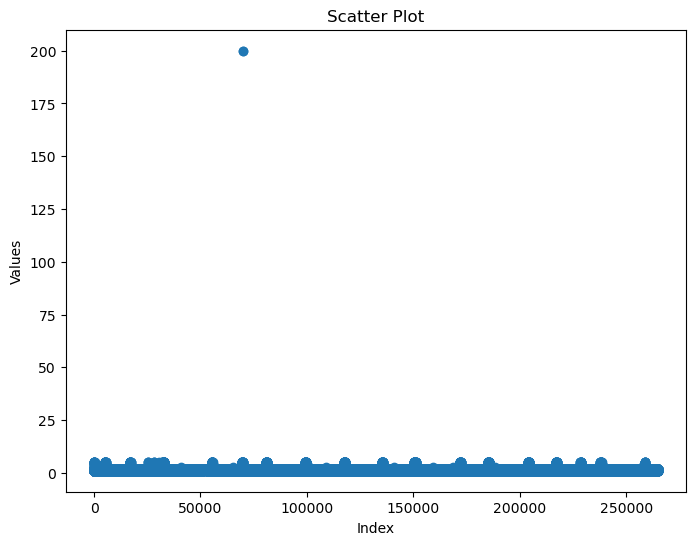

In [16]:
#A scatter plot can help identify outliers in relation to other variables.
plt.figure(figsize=(8, 6))
plt.scatter(transaction.index,transaction['PROD_QTY'])
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

In [17]:
Outlier_row = transaction[transaction['PROD_QTY'] == 200]
Outlier_row

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


<h3 style="text-align:left; color:#FF0000">Note:</h3> <b><i>This Customer only made 2 purchase through out the year, which is not enough to formulate insight into the customer purchase behaviour.<br> Hence, it is in our best interest to remove the information of such a client.</i></b>

In [18]:
Outlier_removed = Outlier_row.index
transaction.drop(Outlier_removed, inplace=True)

In [19]:
# Group by date and count the number of transactions for each date
transactions_by_date = transaction.groupby('DATE')
transactions_by_date.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
4629,2019-03-06,247,247212,249940,85,RRD Honey Soy Chicken 165g,2,6.0
4710,2018-11-23,254,254008,254106,7,Smiths Crinkle Original 330g,1,5.7
4868,2018-11-23,261,261121,260228,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6
4973,2019-01-06,269,269048,265273,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6


In [20]:
transaction['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [21]:
# Create a continuous sequence of dates from 1 Jul 2018 to 30 Jun 2019.
# This will help identify any missing dates in the transaction data.
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Create a new DataFrame containing the full sequence of dates.
# We will merge this with the original data to ensure no dates are missing.
full_dates = pd.DataFrame(date_range, columns=['DATE'])

# Merge the original transaction data with the full date range DataFrame.
# This is a left join, meaning it keeps all dates from the full_dates DataFrame.
# If a date is missing in the original data, it will show up with a NaN (missing value) for transactions.
transaction_m = pd.merge(full_dates, transaction, on='DATE', how='left')

# Fill any missing transaction values (NaNs) with 0.
# This indicates that no transactions occurred on those missing dates.
transaction_m.fillna(0, inplace=True)
transaction_m[transaction_m['TXN_ID'] == 0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
120465,2018-12-25,0.0,0.0,0.0,0.0,0,0.0,0.0


In [22]:
transaction_m[["STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_QTY"]] = transaction_m[["STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_QTY"]].astype('int64')
transaction_m["STORE_NBR"].dtype

dtype('int64')

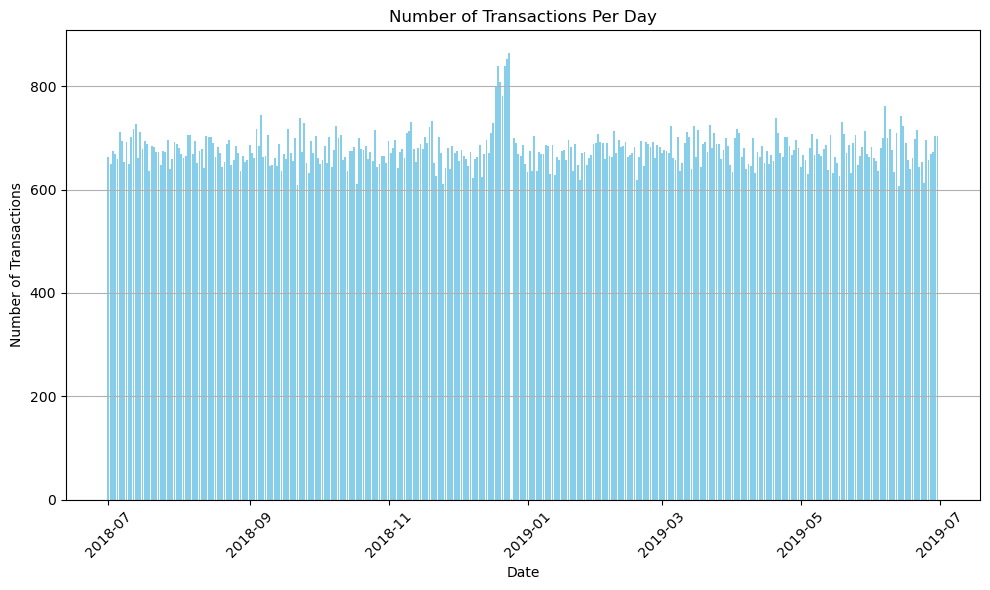

In [23]:
# Group by date and count the number of transactions per day
daily_transactions = transaction_m.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(daily_transactions['DATE'], daily_transactions['TRANSACTION_COUNT'], color='skyblue')
plt.title('Number of Transactions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<b><i>From the plot it can be observed that there is a large spike in sale in the month of December, a day or two before the missing gap which is evidently the date 2018-12-25 that was replaced earlier on, which happen to be christmas dayand is observed as a pubic holiday. Which means there is no sale on that day.</i></b>

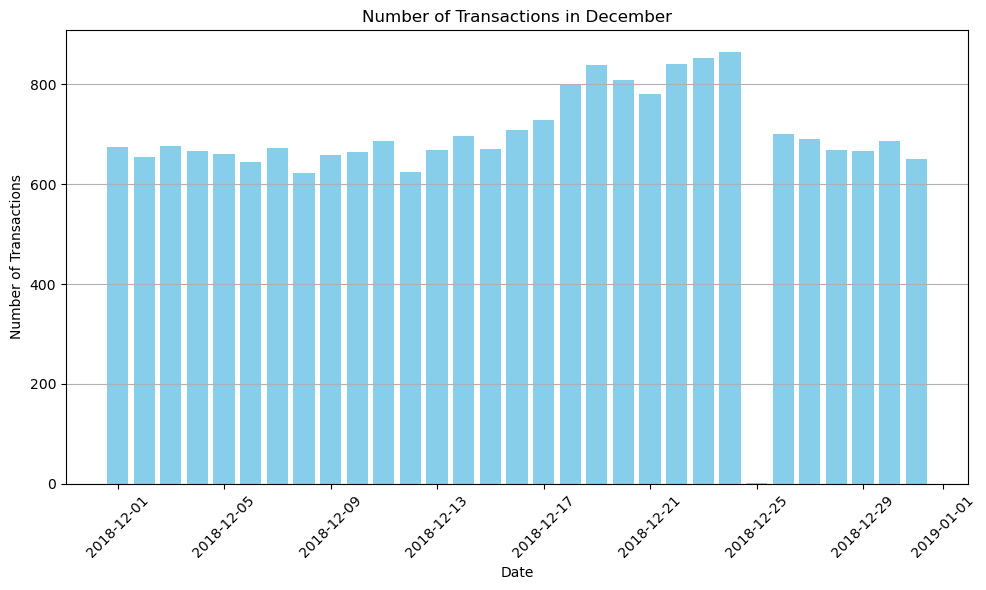

In [24]:
# Filter for December only
december_transactions = transaction_m[transaction_m['DATE'].dt.month == 12]

# Group by date and count the number of transactions
daily_december_transactions = december_transactions.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT')

# Plotting the filtered data for December
plt.figure(figsize=(10, 6))
plt.bar(daily_december_transactions['DATE'], daily_december_transactions['TRANSACTION_COUNT'], color='skyblue')
plt.title('Number of Transactions in December')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### Create a column for the sizes of the product named PACK_SIZE and find the distribution

In [25]:
# Extract the pack size (e.g., '175g', '150g', etc.) and add as a new column called PACK_SIZE
# transaction_m['PACK_SIZE'] = transaction_m['PROD_NAME'].str.extract('(\d+)')
transaction_m['PACK_SIZE'] = transaction_m['PROD_NAME'].str.extract(r'(\d+)[gG]')
# Convert pack sizes to integers, but only if they are not NaN
transaction_m['PACK_SIZE'] = pd.to_numeric(transaction_m['PACK_SIZE'], errors='coerce')
# Optionally: If you need to fill missing pack sizes with 0 or other values, do this:
transaction_m['PACK_SIZE'].fillna(0, inplace=True)
transaction_m['PACK_SIZE'] = transaction_m['PACK_SIZE'].astype(int) 
# Remove the pack size from the PROD_NAME column
transaction_m['PROD_NAME'] = transaction_m['PROD_NAME'].str.replace('(\d+\w+)', '').str.strip()                                                                  




C:\Users\Mishael\AppData\Local\Temp\ipykernel_11544\2344385113.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  transaction_m['PROD_NAME'] = transaction_m['PROD_NAME'].str.replace('(\d+\w+)', '').str.strip()


In [26]:
transaction_m.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
246736,2019-06-30,242,242159,246222,36,Kettle Chilli,2,10.8,175
246737,2019-06-30,244,244213,247339,93,Doritos Corn Chip Southern Chicken,2,7.8,150
246738,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings,2,3.6,190
246739,2019-06-30,257,257079,256218,71,Twisties Cheese Burger,2,8.6,250
246740,2019-06-30,265,265006,263307,106,Natural ChipCo Hony Soy Chckn,1,3.0,175


count    246741.000000
mean        175.582810
std          59.433049
min           0.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64


<AxesSubplot:>

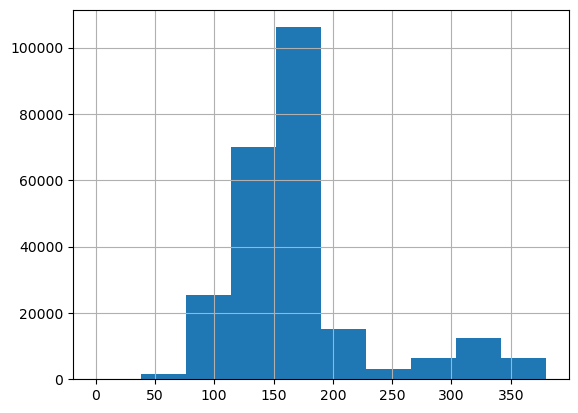

In [27]:
print(transaction_m['PACK_SIZE'].describe())
transaction_m['PACK_SIZE'].hist()

#### Create a New Coumn for the Brand

In [28]:
# Create a new column for brand names
transaction_m['Brand_Name'] = transaction_m['PROD_NAME'].str.split(' ').str[0]

In [29]:
# Check for any duplication or similar brands
transaction_m['Brand_Name'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: Brand_Name, dtype: int64

#### Some brand names were mis-spelt, so they need to be replaced with the correct name
Example : Dorito and Doritos, Grains and GrnWves, Infusions and Ifzns, Natural and NCC, Red and RRD, Smith and Smiths and Snbts and Sunbites.

In [30]:
def brand_names(line):
    brand = line["Brand_Name"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

 # Apply the cleaning function to the DataFrame
transaction_m['Brand_Name'] = transaction_m.apply(lambda line: brand_names(line), axis=1)
transaction_m['Brand_Name'].value_counts()
# Apply the cleaning function to the DataFrame
#transaction_m['Brand_Name'] = transaction_m.apply(brand_names(line), axis=1)


Kettle             41288
Smiths             30353
Doritos            25224
Pringles           25102
RRD                16321
Infuzions          14201
Thins              14075
Woolworths         11836
Cobs                9693
Tostitos            9471
Twisties            9454
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: Brand_Name, dtype: int64

<AxesSubplot:>

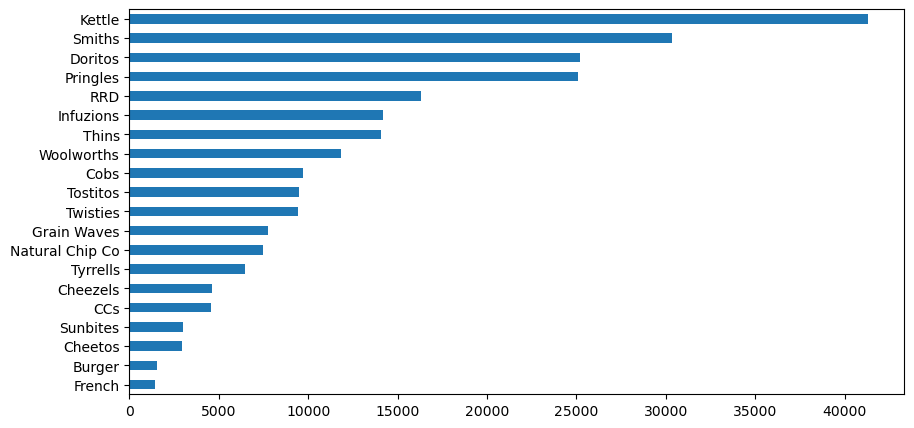

In [31]:
transaction_m['Brand_Name'].value_counts(ascending=True).plot.barh(figsize=(10,5))

### Merge the transaction_m and purchase together

In [32]:
# Perform a left join to keep all transaction entries and merge with the purchase table
merged_tp = pd.merge(transaction_m, purchase, on='LYLTY_CARD_NBR', how='left')
merged_tp.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand_Name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380,Smiths,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken,2,7.4,134,Pringles,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese,2,4.2,175,CCs,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68,68193,65598,44,Thins Chips Light& Tangy,2,6.6,175,Thins,MIDAGE SINGLES/COUPLES,Budget


In [33]:
merged_tp.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           1
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
Brand_Name          1
LIFESTAGE           1
PREMIUM_CUSTOMER    1
dtype: int64

<b><i>We can drop the row of the NULL value since it is not much</i></b>

In [34]:
merged_tp.dropna(inplace=True)
merged_tp.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
Brand_Name          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<div style="display: flex; justify-content: flex-start; align-items: center; background-color:#FDBD55; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37; height: 50px;">
    <a id="eda"><h2 style="text-align:left; color:#342E37">Data visualization & EDA 📈</h2></a>
</div>


<h2><b>Research question on customer segments</b></h2>

---
Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Which Segment of Customer spends the most on chips?
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is?
- How many customers are in each segment?
- How many chips are bought per customer by segment?
- What's the average chip price by customer segment?

<b>Which Segment of Customer spends the most on chips?</b>

In [35]:
# Group by relevant drivers and sum total sales
sales_by_segment = merged_tp.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
sales_by_segment.sort_values(by = "TOT_SALES", ascending=False)

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,376019.65
4,RETIREES,342381.90
2,OLDER FAMILIES,328519.90
5,YOUNG FAMILIES,294627.90
6,YOUNG SINGLES/COUPLES,243756.60
0,MIDAGE SINGLES/COUPLES,172523.80
1,NEW FAMILIES,47347.95


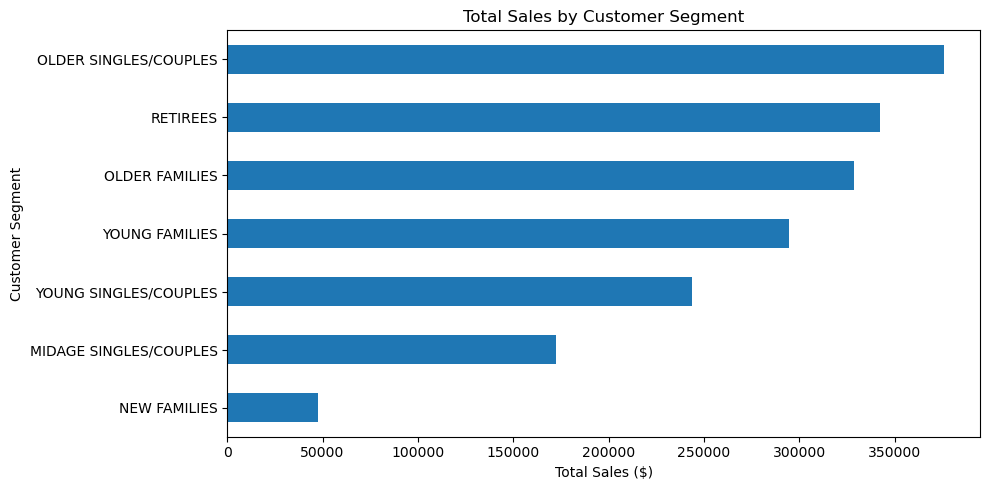

In [36]:
sales_by_segment.set_index('LIFESTAGE')['TOT_SALES'].sort_values().plot.barh(figsize=(10,5))

# Add titles and labels
plt.title('Total Sales by Customer Segment', fontsize=12)
plt.xlabel('Total Sales ($)', fontsize=10)
plt.ylabel('Customer Segment', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

<h3><b> Key Takeaway</b></h3>

---
- The "Older Singles/Couples" and "Retirees" lifestage contribute the most to total sales, indicating that these demographic groups are key drivers of sales for chips.
- Targeting marketing efforts or promotions toward these segments could help to further boost sales.

<b>Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?</b>

In [37]:
# Group by LIFESTAGE and PREMIUM_STATUS, then sum the total sales for each group
spending_by_group = merged_tp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).reset_index()

# Sort the results to see who spends the most
spending_by_group_sorted = spending_by_group.sort_values(by='TOT_SALES', ascending=False)

# Display the result
print(spending_by_group_sorted)


                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  156863.75
19   YOUNG SINGLES/COUPLES       Mainstream  147582.20
13                RETIREES       Mainstream  145168.95
15          YOUNG FAMILIES           Budget  129717.95
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
7           OLDER FAMILIES       Mainstream   96413.55
14                RETIREES          Premium   91296.65
16          YOUNG FAMILIES       Mainstream   86338.25
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
17          YOUNG FAMILIES          Premium   78571.70
8           OLDER FAMILIES          Premium   75242.60
18   YOUNG SINGLES/COUPLES           Budget   57122.10
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
20   YOUNG SINGLES/COUPLES          Premium   39052.30
0   MIDAGE

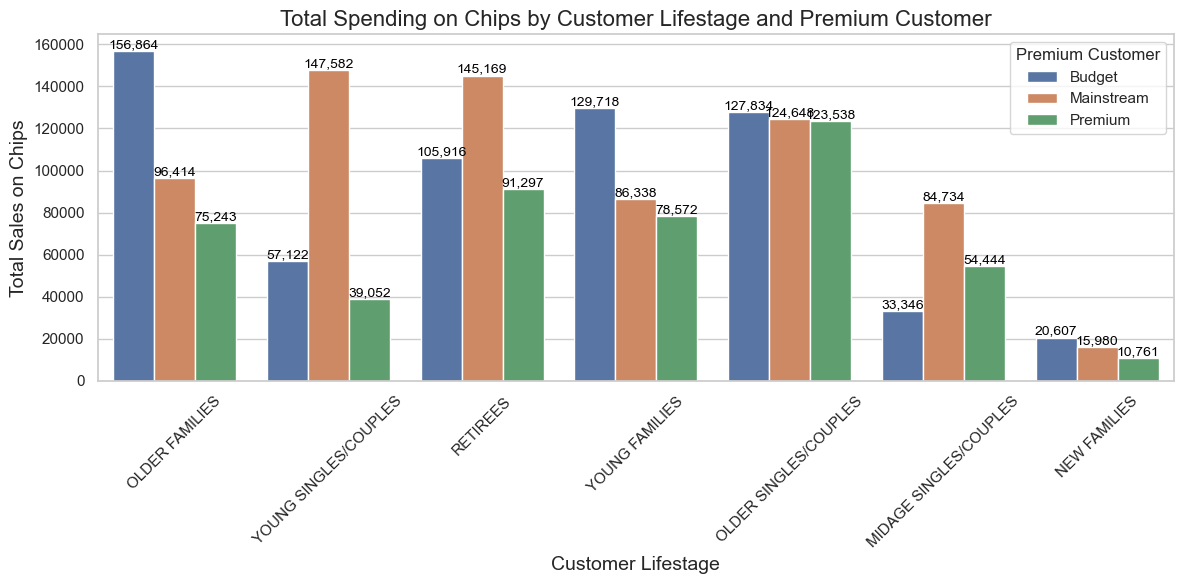

In [38]:
# Assuming spending_by_group_sorted is the DataFrame from the previous step
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=spending_by_group_sorted, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

# Add titles and labels
plt.title('Total Spending on Chips by Customer Lifestage and Premium Customer', fontsize=16)
plt.xlabel('Customer Lifestage', fontsize=14)
plt.ylabel('Total Sales on Chips', fontsize=14)
plt.xticks(rotation=45)

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      rotation=0)

plt.legend(title='Premium Customer')
plt.tight_layout()  # Adjust layout
plt.show()

<h3><b> Key Takeaway</h3></b>

---
- There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This is a major contributor to a higher sales to these customer segments.
- On the otherhand, this is not a major driver for the Budget - Older families segment
- While the Old Singles/Couples are more premium.

<b>How many customers are in each segment?</b>

In [39]:
# Count the number of unique customers in each segment
customer_count_by_segment = merged_tp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Rename columns for clarity
customer_count_by_segment.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'CUSTOMER_COUNT']
customer_count_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,CUSTOMER_COUNT
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


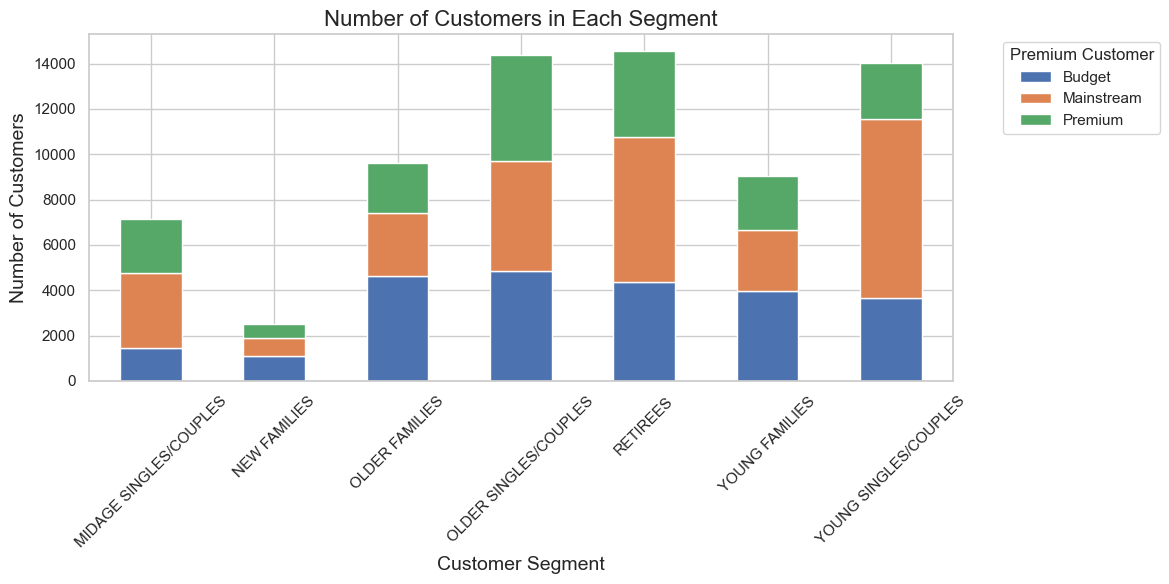

In [40]:
# Pivot the data for stacking
stacked_data = customer_count_by_segment.pivot_table(
    index='LIFESTAGE', 
    columns='PREMIUM_CUSTOMER', 
    values='CUSTOMER_COUNT', 
    fill_value=0
)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
stacked_data.plot(kind='bar', stacked=True, ax=plt.gca())

# Add titles and labels
plt.title('Number of Customers in Each Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h3><b> Key Takeaway</h3></b>

---
- Majority of the Market are the retirees and Older singles/couples, who are mostly Mainstream Customers

<b>How many chips are bought per customer by segment?</b>

In [41]:
# Group by customer segment and LYLTY_CARD_NBR, summing the quantity
chips_per_customer = merged_tp.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE', 'LYLTY_CARD_NBR'])['PROD_QTY'].sum().reset_index()

# Count the number of unique customers per segment
customer_count = chips_per_customer.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().reset_index(name='CUSTOMER_COUNT')

# Calculate total chips bought per segment
total_chips_per_segment = chips_per_customer.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()

# Merge the two DataFrames to get average chips bought per customer by segment
average_chips_per_customer = pd.merge(total_chips_per_segment, customer_count, on='LIFESTAGE')
average_chips_per_customer['CHIPS_PER_CUSTOMER'] = average_chips_per_customer['PROD_QTY'] / average_chips_per_customer['CUSTOMER_COUNT']
average_chips_per_customer['CHIPS_PER_CUSTOMER'] = average_chips_per_customer['CHIPS_PER_CUSTOMER'].round()
average_chips_per_customer

,LIFESTAGE,PROD_QTY,PREMIUM_CUSTOMER,CUSTOMER_COUNT,CHIPS_PER_CUSTOMER
0,MIDAGE SINGLES/COUPLES,44496,Budget,1474,30.0
1,MIDAGE SINGLES/COUPLES,44496,Mainstream,3298,13.0
2,MIDAGE SINGLES/COUPLES,44496,Premium,2369,19.0
3,NEW FAMILIES,12070,Budget,1087,11.0
4,NEW FAMILIES,12070,Mainstream,830,15.0
5,NEW FAMILIES,12070,Premium,575,21.0
6,OLDER FAMILIES,87896,Budget,4611,19.0
7,OLDER FAMILIES,87896,Mainstream,2788,32.0
8,OLDER FAMILIES,87896,Premium,2231,39.0
9,OLDER SINGLES/COUPLES,97185,Budget,4849,20.0


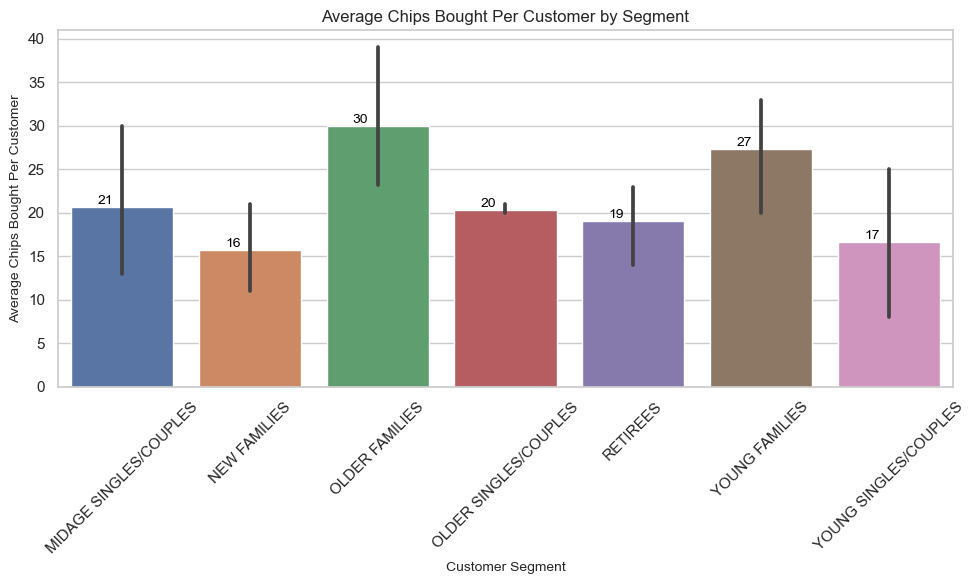

In [42]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=average_chips_per_customer, x='LIFESTAGE', y='CHIPS_PER_CUSTOMER')

# Add data labels inside the bars

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 3., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      rotation=0)

# Add titles and labels
plt.title('Average Chips Bought Per Customer by Segment', fontsize=12)
plt.xlabel('Customer Segment', fontsize=10)
plt.ylabel('Average Chips Bought Per Customer', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()




<h3><b> Key Takeaway</b></h3>

---
- The Older families and the young families buy more chips per customer than any other segment. Although they are majorly Budget Customers

<b>What's the average chip price by customer segment?</b>

<h3 style="text-align:left; color:#FF0000">Note:</h3>
<b><i>Without the Chip price directly provided to work with. Given the total sales and product quantity in your dataset, you can calculate the average chip price by dividing the total sales by the product quantity for each transaction. Then, you can aggregate this average price by customer segment.</i></b>

In [43]:
# Calculate the price per chip for each transaction
merged_tp['CHIP_PRICE'] = merged_tp['TOT_SALES'] / merged_tp['PROD_QTY']

# Group by customer segment and calculate the average chip price
average_price_by_segment = merged_tp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['CHIP_PRICE'].mean().reset_index()

# Rename the column for clarity
average_price_by_segment.rename(columns={'CHIP_PRICE': 'AVERAGE_CHIP_PRICE'}, inplace=True)
average_price_by_segment.head()

,LIFESTAGE,PREMIUM_CUSTOMER,AVERAGE_CHIP_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133


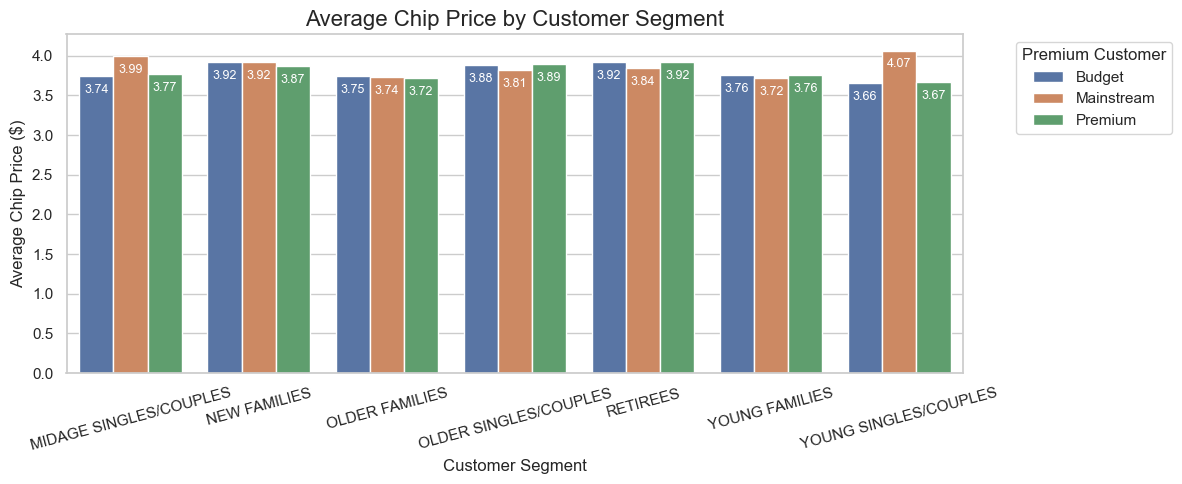

In [44]:
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(x='LIFESTAGE', y='AVERAGE_CHIP_PRICE', data=average_price_by_segment, hue='PREMIUM_CUSTOMER')

# Show value labels inside the bars
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 0.1,  # Adjust this value to position the text inside the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', va='top',  # Align text to center horizontally and top vertically
             color='white', fontsize=9)

# Add title and labels
plt.title('Average Chip Price by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Chip Price ($)', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h3><b> Key Takeaway</b></h3>

---

- "Mainstream midage/couples" and "young singles/couples" are more willing to pay more per packet of chips compared to their budget and premium counterparts. 
- This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.
- This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts

<b>Perform an independent t-test between mainstream and non-mainstream mid-age and young singles/couples to see if the difference is significant.</b>

In [45]:
from scipy import stats

# Filter the data for Midage Singles/Couples and Young Singles/Couples (use capital letters)
filtered_data = merged_tp[merged_tp['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])]

# Separate the data into Mainstream and Non-Mainstream
mainstream = filtered_data[filtered_data['PREMIUM_CUSTOMER'] == 'Mainstream']['CHIP_PRICE'].dropna()
non_mainstream = filtered_data[filtered_data['PREMIUM_CUSTOMER'] != 'Mainstream']['CHIP_PRICE'].dropna()

# Check the sizes of the groups
print(f"Mainstream Count: {len(mainstream)}")
print(f"Non-Mainstream Count: {len(non_mainstream)}")

# Proceed with t-test only if both groups have data
if len(mainstream) > 0 and len(non_mainstream) > 0:
    # Perform an independent t-test
    t_stat, p_value = stats.ttest_ind(mainstream, non_mainstream, equal_var=False)
    # Output the t-statistic and p-value
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
else:
    print("One or both groups have no data for the t-test.")

Mainstream Count: 30639
Non-Mainstream Count: 26728
T-statistic: 37.6243885962295, P-value: 6.967354233018139e-306


<b>A high T-statistic (like 37.62) suggests a substantial difference between the two group means.
Typically, a T-statistic greater than 2 or less than -2 indicates a significant difference, depending on the direction of the test while the P-value of 6.97e-306 (essentially 0.000... with many zeros) is extremely low, far below common significance levels (e.g., 0.05, 0.01). This indicates that you can reject the null hypothesis with high confidence.</b>

---
-  The results suggest a statistically significant difference in average chip prices between mainstream and non-mainstream customers within the specified life stages (Midage Singles/Couples and Young Singles/Couples). <br>
- This means that the average chip price is significantly different for mainstream customers compared to non-mainstream customers.

<b>How many transaction are made by Customer Segment?</b>

In [46]:
# Group by customer segment and count the number of transactions
transactions_by_segment = merged_tp.groupby('LIFESTAGE')['TXN_ID'].nunique().reset_index()
transactions_by_segment

,LIFESTAGE,TXN_ID
0,MIDAGE SINGLES/COUPLES,23259
1,NEW FAMILIES,6477
2,OLDER FAMILIES,44755
3,OLDER SINGLES/COUPLES,50506
4,RETIREES,46205
5,YOUNG FAMILIES,40190
6,YOUNG SINGLES/COUPLES,33863


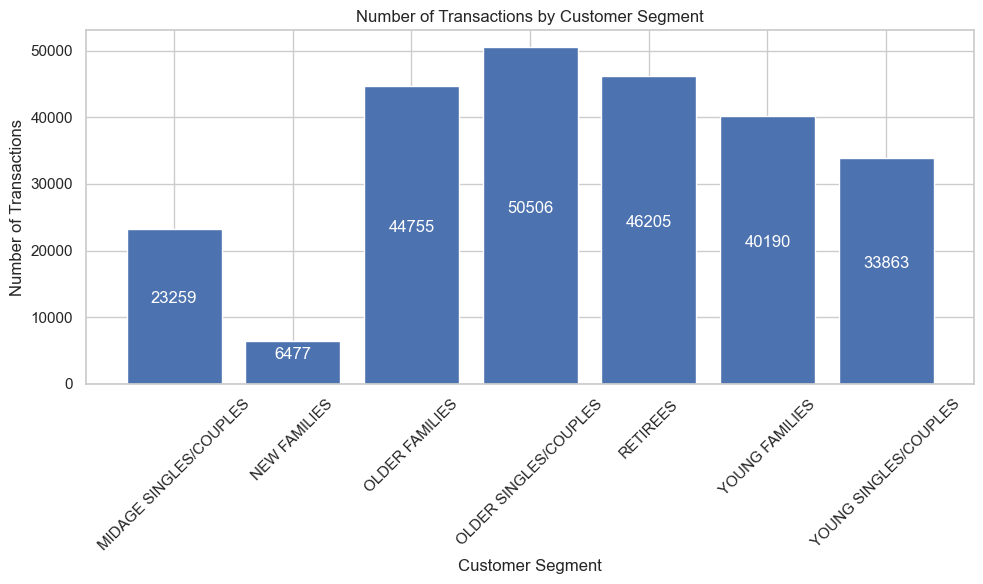

In [47]:
# Plot transactions by customer segment
plt.figure(figsize=(10, 6))
bars = plt.bar(transactions_by_segment['LIFESTAGE'], transactions_by_segment['TXN_ID'])
plt.title('Number of Transactions by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - yval*0.5, round(yval, 2), ha='center', va='bottom', color='WHITE')

plt.tight_layout()
plt.show()

<h3><b> Key Takeaway</b></h3>

---
- "Older Singles/Couples" and "Retirees" have higher transaction counts.
- This could mean these segments are frequent purchasers, but smaller transaction sizes. Promotions offering discounts for bulk purchases might encourage them to increase their spending per transaction.


<b>What is the average spend per transaction by segment?</b>

In [48]:
# Calculate average spend per transaction by segment
avg_spend_per_txn = merged_tp.groupby('LIFESTAGE').agg({'TOT_SALES': 'sum', 'TXN_ID': 'nunique'})
avg_spend_per_txn['AVG_SPEND'] = avg_spend_per_txn['TOT_SALES'] / avg_spend_per_txn['TXN_ID']
avg_spend_per_txn

,TOT_SALES,TXN_ID,AVG_SPEND
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,172523.80,23259,7.417507
NEW FAMILIES,47347.95,6477,7.310167
OLDER FAMILIES,328519.90,44755,7.340407
OLDER SINGLES/COUPLES,376019.65,50506,7.445049
RETIREES,342381.90,46205,7.410062
YOUNG FAMILIES,294627.90,40190,7.330876
YOUNG SINGLES/COUPLES,243756.60,33863,7.198317


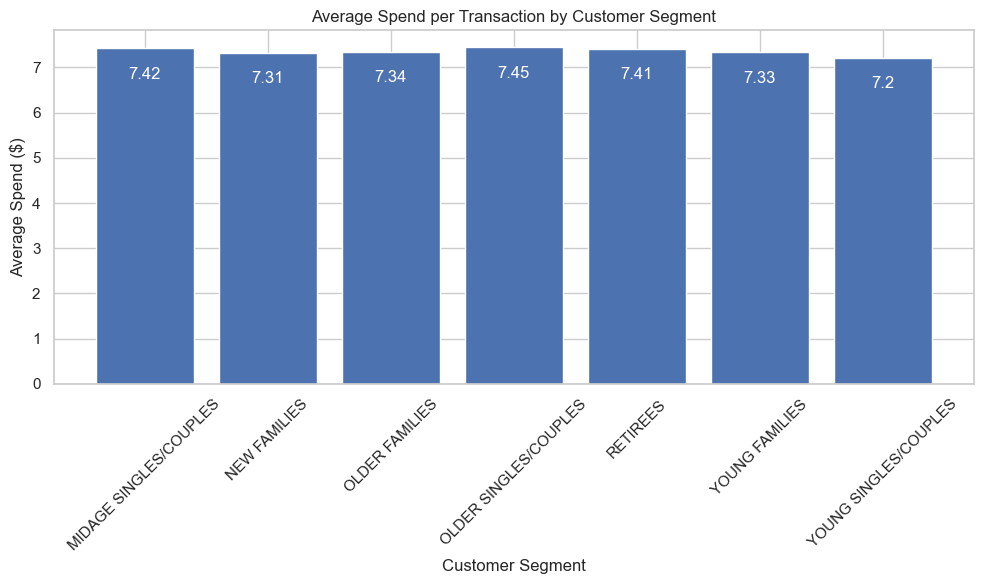

In [49]:
# Plot average spend by customer segment
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_spend_per_txn.index, avg_spend_per_txn['AVG_SPEND'],)
plt.title('Average Spend per Transaction by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Spend ($)')
plt.xticks(rotation=45)

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - yval*0.1, round(yval, 2), ha='center', va='bottom', color='white', fontsize=12)

plt.tight_layout()
plt.show()

<h3><b> Key Takeaway</b></h3>

---
- "Older Singles/Couples" and "Midage Singles/Couples" tend to spend more per transaction, suggesting they have larger basket sizes when they shop.
- Premium product promotions and bundle offers could appeal to these groups.

<b> What is the Average sale Per Packet Size?</b>

In [50]:
# Group by packet size and sum the sales quantity
packet_sales = merged_tp.groupby('PACK_SIZE')['PROD_QTY', 'TOT_SALES'].sum().reset_index()

# Calculate average sales per packet size
packet_sales['AVG_SALES'] = packet_sales['TOT_SALES'] / packet_sales['PROD_QTY']
packet_sales.sort_values(by='PROD_QTY', ascending=False).head()

C:\Users\Mishael\AppData\Local\Temp\ipykernel_11544\1814823004.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  packet_sales = merged_tp.groupby('PACK_SIZE')['PROD_QTY', 'TOT_SALES'].sum().reset_index()


,PACK_SIZE,PROD_QTY,TOT_SALES,AVG_SALES
10,175,126467,485437.4,3.838451
6,150,76662,289681.8,3.778688
4,134,48019,177655.5,3.699692
2,110,42835,162765.4,3.799823
9,170,38088,146673.0,3.850898


In [52]:
# Group by packet size and sum the sales quantity
packet_perc = merged_tp.groupby('PACK_SIZE')['PROD_QTY', 'TOT_SALES'].sum().reset_index()

# Calculate percentage sales per packet size
total = merged_tp['TOT_SALES'].sum()
packet_perc['SALES_PERCENT'] = (packet_perc['TOT_SALES'] / total) * 100
packet_perc.sort_values(by='SALES_PERCENT', ascending=False).head()

C:\Users\Mishael\AppData\Local\Temp\ipykernel_11544\747711279.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  packet_perc = merged_tp.groupby('PACK_SIZE')['PROD_QTY', 'TOT_SALES'].sum().reset_index()


,PACK_SIZE,PROD_QTY,TOT_SALES,SALES_PERCENT
10,175,126467,485437.4,26.891391
6,150,76662,289681.8,16.047273
4,134,48019,177655.5,9.841441
2,110,42835,162765.4,9.016586
9,170,38088,146673.0,8.125128


Pack size 175g makes up over 25% (one-quater) of the total sale, and is almost twice the 2nd most sold pack size 150g

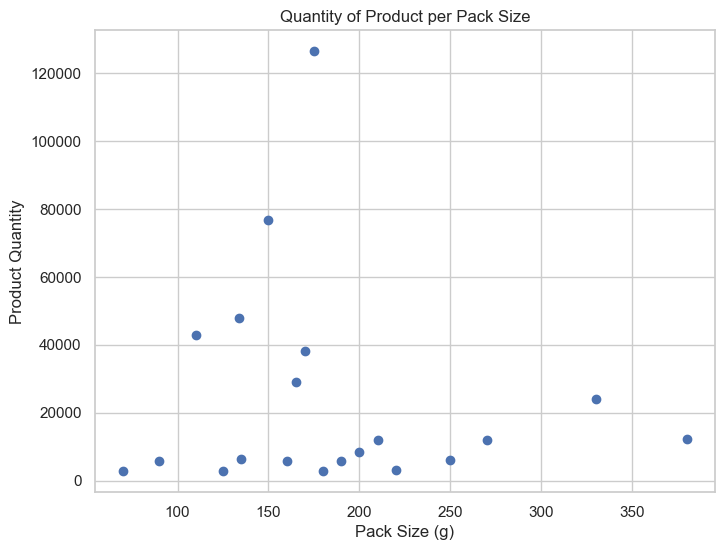

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(packet_sales['PACK_SIZE'],packet_sales['PROD_QTY'] )
plt.title('Quantity of Product per Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Product Quantity')
plt.show()

In [54]:
# Step 1: Group by customer segment and packet size
grouped_data = merged_tp.groupby(['LIFESTAGE', 'PACK_SIZE'])['PROD_QTY', 'TOT_SALES'].sum().reset_index()

# Step 2: Calculate average sales per packet size for each segment
grouped_data['AVG_SALES'] = grouped_data['TOT_SALES'] / grouped_data['PROD_QTY']
grouped_data[grouped_data['PACK_SIZE'] == 175].sort_values(by='PROD_QTY',ascending=False)

C:\Users\Mishael\AppData\Local\Temp\ipykernel_11544\1818872936.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = merged_tp.groupby(['LIFESTAGE', 'PACK_SIZE'])['PROD_QTY', 'TOT_SALES'].sum().reset_index()


,LIFESTAGE,PACK_SIZE,PROD_QTY,TOT_SALES,AVG_SALES
70,OLDER SINGLES/COUPLES,175,26044,100931.9,3.875438
50,OLDER FAMILIES,175,23806,88563.5,3.720218
90,RETIREES,175,23556,92087.4,3.909297
110,YOUNG FAMILIES,175,21466,80213.6,3.736774
130,YOUNG SINGLES/COUPLES,175,16371,64121.5,3.916774
10,MIDAGE SINGLES/COUPLES,175,12022,46765.2,3.889968
30,NEW FAMILIES,175,3202,12754.3,3.983229


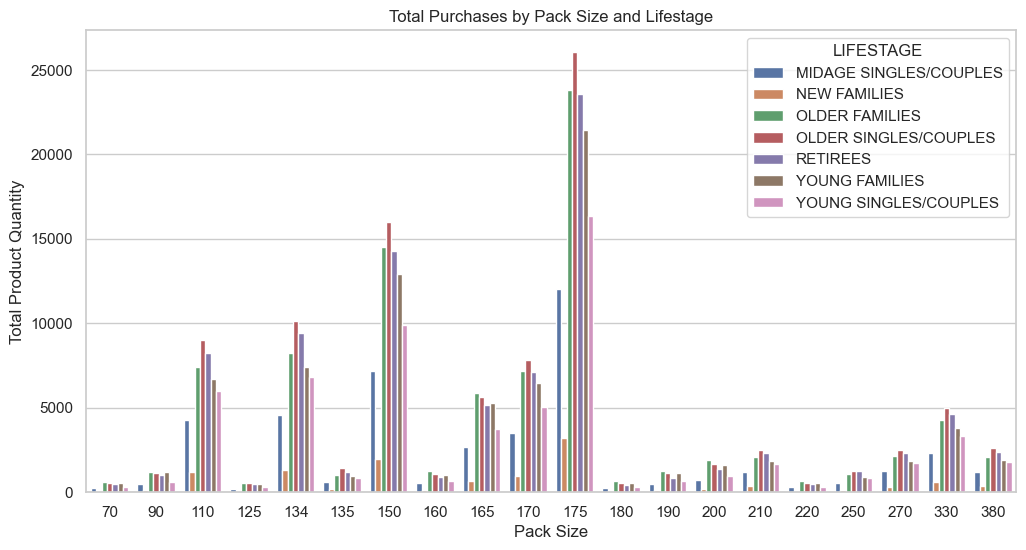

In [55]:
# Create a bar plot to visualize total purchases by pack size across lifestages
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='PACK_SIZE', y='PROD_QTY', hue='LIFESTAGE')
plt.title('Total Purchases by Pack Size and Lifestage')
plt.xlabel('Pack Size')
plt.ylabel('Total Product Quantity')
plt.legend(title='LIFESTAGE')
plt.show()

- 175g is the most purchased chips size across every lifestage

In [56]:
import statsmodels.api as sm

# Create dummy variables for lifestages
lifestage_dummies = pd.get_dummies(merged_tp['LIFESTAGE'], drop_first=True)

# Combine the pack size and dummies
X = sm.add_constant(pd.DataFrame({'PACK_SIZE': merged_tp['PACK_SIZE']}).join(lifestage_dummies))

# Dependent variable
y = merged_tp['PROD_QTY']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               PROD_QTY   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:13:51   Log-Likelihood:                -84337.
No. Observations:              246740   AIC:                         1.687e+05
Df Residuals:                  246732   BIC:                         1.688e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.89

### Corrected Interpretation for `PACK_SIZE` Coefficient:

- **PACK_SIZE** coefficient is **2.695e-05**, which is **0.00002695**. 
- This means that for each 1-unit increase in pack size, the quantity purchased increases by a very small amount: **0.00002695 units**.

Since this coefficient is so small, it suggests that **pack size has a very small direct effect** on the quantity of product purchased, but it is still statistically significant (with a very low p-value, indicating that even a small effect exists consistently across the data).

### Why It's Still Significant:
- **P-value for `PACK_SIZE`:** The p-value is very small, so the effect, even though tiny, is statistically significant.
- This could mean that, while pack size does influence the quantity purchased, the **impact is not very large** in practical terms — though it may be consistent across different observations.

---

### Overall Insights:
- **Pack Size Influence:** While the **influence of pack size is positive**, its **impact is quite small** on the quantity purchased. For every increase in pack size, the effect on the product quantity is minimal, even though it's statistically significant.
- **Lifestage Effects:** Some lifestages like "NEW FAMILIES" have a negative effect on product quantity, while others like "OLDER FAMILIES" and "YOUNG FAMILIES" show slight increases in purchases. These effects are larger than the pack size coefficient in most cases.

**How many times each brand is purchased in total across all transactions?**

In [57]:
# Count how many times each brand is purchased in total across all transactions
brand_purchase_counts = merged_tp.groupby('Brand_Name')['TXN_ID'].nunique().reset_index()
brand_purchase_counts.rename(columns={'TXN_ID': 'PURCHASE_COUNT'}, inplace=True)
brand_purchase_counts.sort_values(by='PURCHASE_COUNT', ascending=False)


,Brand_Name,PURCHASE_COUNT
9,Kettle,41257
13,Smiths,30327
5,Doritos,25204
11,Pringles,25093
12,RRD,16311
8,Infuzions,14198
15,Thins,14072
19,Woolworths,11830
4,Cobs,9692
16,Tostitos,9469


In [58]:
# Group by BRAND and LIFESTAGE and count unique transactions
brand_lifestage_counts = merged_tp.groupby(['Brand_Name', 'LIFESTAGE'])['TXN_ID'].nunique().reset_index()

# Rename the column for clarity
brand_lifestage_counts.rename(columns={'TXN_ID': 'PURCHASE_COUNT'}, inplace=True)

# Sort the data by PURCHASE_COUNT to see the most popular combinations of brand and lifestage
brand_lifestage_counts.sort_values(by='PURCHASE_COUNT', ascending=False, inplace=True)


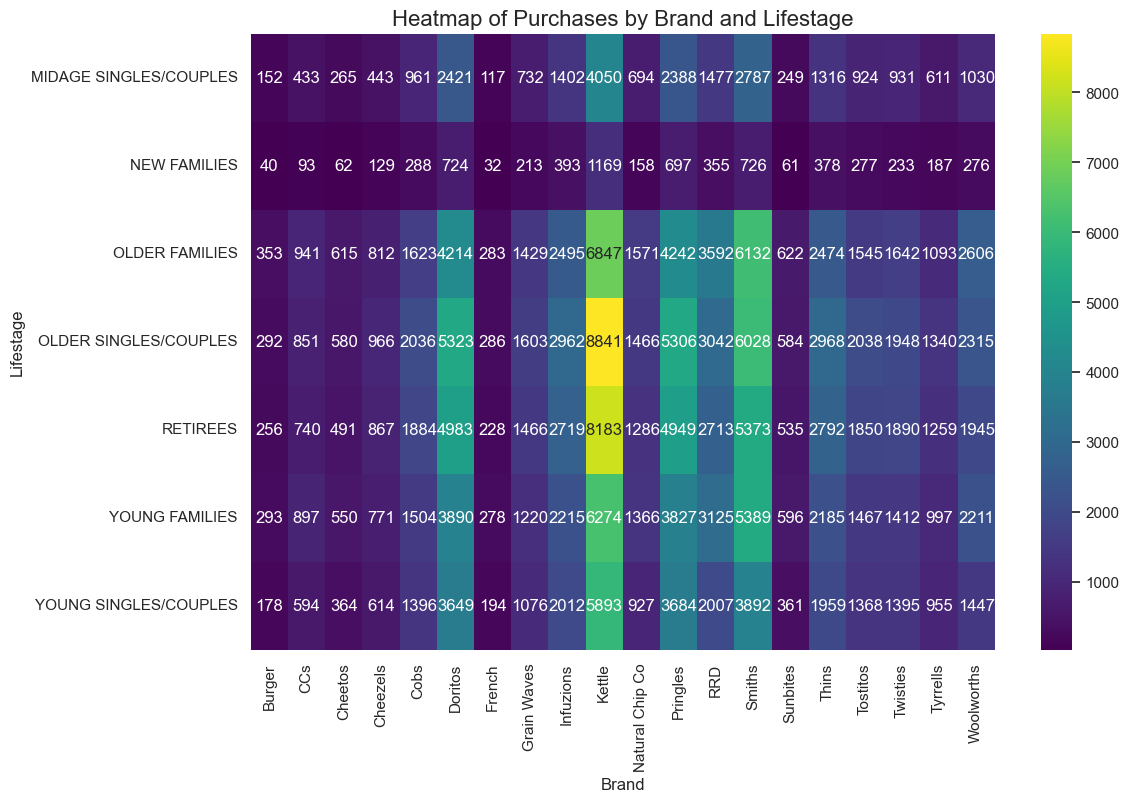

In [59]:
# Pivot the data to create a heatmap-friendly format
pivot_data = brand_lifestage_counts.pivot(index='LIFESTAGE', columns='Brand_Name', values='PURCHASE_COUNT')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='.0f')

# Add labels and title
plt.title('Heatmap of Purchases by Brand and Lifestage', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Lifestage', fontsize=12)

# Show the plot
plt.show()

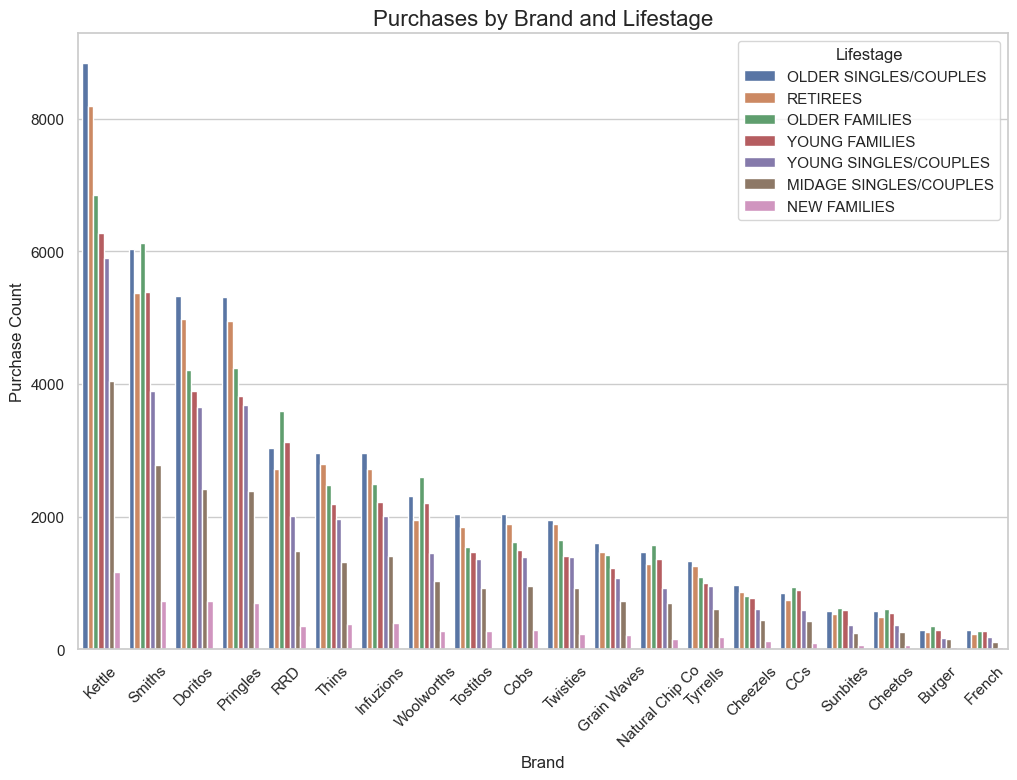

In [60]:
# Plot a stacked bar chart showing purchases by LIFESTAGE for each BRAND
plt.figure(figsize=(12, 8))
sns.barplot(data=brand_lifestage_counts, x='Brand_Name', y='PURCHASE_COUNT', hue='LIFESTAGE')

# Add labels and title
plt.title('Purchases by Brand and Lifestage', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate brand names for readability
plt.legend(title='Lifestage')

# Show the plot
plt.show()

<h3><b> Key Takeaway</b></h3>

---
- The Kettle Brand is arguably the most purchasd brand across the lifestage with Older Singles/Couples and Retirees customers toping the list.

<b> Percentage brand share of total sales </b>

In [61]:
# Calculate total sales by brand
brand_sales = merged_tp.groupby('Brand_Name')['TOT_SALES'].sum().reset_index()

# Calculate brand share of total sales
total_sales = merged_tp['TOT_SALES'].sum()
brand_sales['SALES_SHARE'] = (brand_sales['TOT_SALES'] / total_sales) * 100
brand_sales.sort_values(by='SALES_SHARE', ascending=False).head()

,Brand_Name,TOT_SALES,SALES_SHARE
9,Kettle,390239.8,21.617805
5,Doritos,226329.9,12.537818
13,Smiths,217492.0,12.048232
11,Pringles,177655.5,9.841441
8,Infuzions,99047.6,5.486861


In [62]:
# Calculate purchase frequency by brand
purchase_frequency = merged_tp.groupby('Brand_Name')['TXN_ID'].count().reset_index()
total_transactions = merged_tp['TXN_ID'].nunique()
purchase_frequency['PURCHASE_FREQUENCY'] = purchase_frequency['TXN_ID'] / total_transactions
purchase_frequency.sort_values(by='PURCHASE_FREQUENCY', ascending=False)

,Brand_Name,TXN_ID,PURCHASE_FREQUENCY
9,Kettle,41288,0.168347
13,Smiths,30353,0.123761
5,Doritos,25224,0.102848
11,Pringles,25102,0.102351
12,RRD,16321,0.066547
8,Infuzions,14201,0.057903
15,Thins,14075,0.057389
19,Woolworths,11836,0.048260
4,Cobs,9693,0.039522
16,Tostitos,9471,0.038617


In [63]:
# Count the number of unique brands per transaction
brand_exclusivity = merged_tp.groupby('TXN_ID')['Brand_Name'].nunique().reset_index()
brand_exclusivity.rename(columns={'Brand_Name': 'UNIQUE_BRAND_COUNT'}, inplace=True)

# Identify transactions that involve only one brand
single_brand_transactions = brand_exclusivity[brand_exclusivity['UNIQUE_BRAND_COUNT'] == 1]

# Calculate percentage of transactions involving only one brand
total_transactions = merged_tp['TXN_ID'].nunique()
exclusive_brand_percentage = single_brand_transactions.shape[0] / total_transactions * 100
print(f"Percentage of single-brand transactions: {exclusive_brand_percentage:.2f}%")


Percentage of single-brand transactions: 99.44%


In [64]:
# Count the number of unique brands across multiple transactions
repeat_brand_purchases = merged_tp.groupby(['Brand_Name'])['TXN_ID'].nunique().reset_index()
repeat_brand_purchases.rename(columns={'TXN_ID': 'REPEAT_TRANSACTION_COUNT'}, inplace=True)

# Sort by the number of repeat purchases
repeat_brand_purchases.sort_values(by='REPEAT_TRANSACTION_COUNT', ascending=False, inplace=True)

# Display the brands with the highest repeat transactions
print(repeat_brand_purchases.head())

   Brand_Name  REPEAT_TRANSACTION_COUNT
9      Kettle                     41257
13     Smiths                     30327
5     Doritos                     25204
11   Pringles                     25093
12        RRD                     16311


In [65]:
# Group by BRAND and LIFESTAGE, then count the number of purchases
brand_lifestage_affinity = merged_tp.groupby(['Brand_Name', 'LIFESTAGE'])['TXN_ID'].nunique().reset_index()

# Rename the column for clarity
brand_lifestage_affinity.rename(columns={'TXN_ID': 'PURCHASE_COUNT'}, inplace=True)

# Sort by PURCHASE_COUNT to see which brand-lifestage combinations are the most common
brand_lifestage_affinity.sort_values(by='PURCHASE_COUNT', ascending=False, inplace=True)

brand_lifestage_affinity.head(10)

,Brand_Name,LIFESTAGE,PURCHASE_COUNT
66,Kettle,OLDER SINGLES/COUPLES,8841
67,Kettle,RETIREES,8183
65,Kettle,OLDER FAMILIES,6847
68,Kettle,YOUNG FAMILIES,6274
93,Smiths,OLDER FAMILIES,6132
94,Smiths,OLDER SINGLES/COUPLES,6028
69,Kettle,YOUNG SINGLES/COUPLES,5893
96,Smiths,YOUNG FAMILIES,5389
95,Smiths,RETIREES,5373
38,Doritos,OLDER SINGLES/COUPLES,5323


<h2><b> Trends and Insights :</b></h2>

---
Top 3 total sales contributor from each Sale segment are

- Older families (Budget) `$156,864`
- Young Singles/Couples (Mainstream) `$147,582`
- Older Singles/Couples (Premium) `$123,538`

---
1. The "Older Singles/Couples" and "Retirees" lifestage contribute the most to total sales, indicating that these demographic groups are key drivers of sales for chips.
2. "Older Singles/Couples" and "Midage Singles/Couples" tend to spend more per transaction, suggesting they have larger basket sizes when they shop.
3. Mainstream "midage/couples" and "young singles/couples" are more willing to pay more per packet of chips compared to their budget and premium counterparts.
4. The Budget "Older families" and the "young families" buy more chips per customer than any other segment.
5. The result for the `independent t-test` between mainstream and non-mainstream mid-age and young singles/couples to check for significant difference:
- A high `T-statistic (like 37.62)` suggests a substantial difference between the two group means.
- The results suggest a statistically significant difference in average chip prices between mainstream and non-mainstream customers within the specified life stages (Midage Singles/Couples and Young Singles/Couples).
6. "Older Singles/Couples" and "Retirees" have higher transaction counts. This could mean these segments are frequent purchasers. Similarly, "Older Singles/Couples" and "Midage Singles/Couples" tend to spend more per transaction, suggesting they have larger basket sizes when they shop.
7. Pack size `175g` makes up over `25%` (one-quater) of the total sale, and is almost twice the 2nd most sold pack size 150g
8. The `Kettle Brand` is arguably the most purchasd brand across the lifestage with `21%` of the total sale and Older Singles/Couples and Retirees customers toping the list.

<b><h2>Views and Recommendations:</b></h2>

---
- Older Families: Focus on the Budget segment. Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase. Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.

- Young Singles/Couples: Focus on the Mainstream segment. This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment. Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.

- Retirees: Focus on the Mainstream segment. Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.

- General: All segments has Kettle as the most frequently purchased brand, and 175g (regardless of brand) followed by 150g as the preferred chip size. When promoting chips in general to all segments it is good to take advantage of these two points.